In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Load dataset from CSV
restaurants_df = pd.read_csv('Dataset.csv')

# Content-Based Filtering\
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(restaurants_df['Cuisines'].fillna(''))
content_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

def recommend_restaurants(country_code, city, cuisines, avg_cost):
    filtered_df = restaurants_df.copy()
    if country_code:
        filtered_df = filtered_df[filtered_df['Country Code'] == int(country_code)]
    if city:
        filtered_df = filtered_df[filtered_df['City'].str.contains(city, case=False, na=False)]
    if cuisines:
        filtered_df = filtered_df[filtered_df['Cuisines'].str.contains(cuisines, case=False, na=False)]
    if avg_cost:
        filtered_df = filtered_df[filtered_df['Average Cost for two'] <= int(avg_cost)]
    
    if filtered_df.empty:
        return "\n❌ No restaurants match the selected criteria. Please try again."
    
    recommendations = filtered_df[['Restaurant Name', 'City', 'Cuisines', 'Average Cost for two', 'Aggregate rating']].head(10)
    
    result = "\n✅ Recommended Restaurants:\n"
    result += "=" * 50 + "\n"
    for _, row in recommendations.iterrows():
        result += f"🍽️ {row['Restaurant Name']} ({row['City']})\n   🍛 Cuisines: {row['Cuisines']}\n   💰 Average Cost for Two: {row['Average Cost for two']}\n   ⭐ Aggregate Rating: {row['Aggregate rating']}\n"
        result += "-" * 50 + "\n"
    return result

# Simple User Input
country_code = input("Enter Country Code: ")
city = input("Enter City: ")
cuisines = input("Enter Cuisines: ")
avg_cost = input("Enter Max Average Cost for Two: ")

# Call the recommendation function and print results
print(recommend_restaurants(country_code, city, cuisines, avg_cost))


Enter Country Code:  1
Enter City:  gurgaon
Enter Cuisines:  North indian
Enter Max Average Cost for Two:  2000



✅ Recommended Restaurants:
🍽️ Pind Balluchi (Gurgaon)
   🍛 Cuisines: North Indian, Mughlai
   💰 Average Cost for Two: 800
   ⭐ Aggregate Rating: 2.7
--------------------------------------------------
🍽️ Punjab Grill (Gurgaon)
   🍛 Cuisines: North Indian, Mughlai
   💰 Average Cost for Two: 2000
   ⭐ Aggregate Rating: 4.3
--------------------------------------------------
🍽️ Aha Bites (Gurgaon)
   🍛 Cuisines: Fast Food, North Indian
   💰 Average Cost for Two: 300
   ⭐ Aggregate Rating: 0.0
--------------------------------------------------
🍽️ Ancient Spice (Gurgaon)
   🍛 Cuisines: North Indian, Chinese
   💰 Average Cost for Two: 300
   ⭐ Aggregate Rating: 0.0
--------------------------------------------------
🍽️ Chimney - The Takeaway (Gurgaon)
   🍛 Cuisines: North Indian, South Indian, Chinese
   💰 Average Cost for Two: 500
   ⭐ Aggregate Rating: 0.0
--------------------------------------------------
🍽️ Gopi Sweets & Caters (Gurgaon)
   🍛 Cuisines: Mithai, North Indian
   💰 Average Cos

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import time

# Load dataset from CSV
restaurants_df = pd.read_csv('Dataset_Updated.csv')

# Content-Based Filtering
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(restaurants_df['Cuisines'].fillna(''))
content_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Prepare data for classification model
restaurants_df['Price Category'] = pd.qcut(restaurants_df['Average Cost for two'], q=4, labels=[1, 2, 3, 4])
X = restaurants_df[['Country Code', 'City', 'Cuisines', 'Average Cost for two']]
X = pd.get_dummies(X, columns=['City', 'Cuisines'], drop_first=True)
y = restaurants_df['Price Category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train classifier with hyperparameter tuning
classifier = RandomForestClassifier(n_estimators=100, max_depth=15, min_samples_split=5, min_samples_leaf=2, random_state=42)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

# Model evaluation
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Check for Overfitting vs. Underfitting
train_accuracy = accuracy_score(y_train, classifier.predict(X_train))
test_accuracy = accuracy_score(y_test, classifier.predict(X_test))
print(f"\n\U0001F3CB️ Training Accuracy: {train_accuracy:.4f}")
print(f"\U0001F9EA Test Accuracy: {test_accuracy:.4f}")

if train_accuracy > test_accuracy + 0.1:
    print("⚠️ Warning: Potential Overfitting! Try tuning hyperparameters.")
elif train_accuracy < 0.7 and test_accuracy < 0.7:
    print("⚠️ Warning: Potential Underfitting! Try increasing model complexity.")
else:
    print("✅ Model is well-balanced!")

# Restaurant Recommendation Function
def recommend_restaurants():
    country_code = input("Enter Country Code (press Enter to skip): ")
    city = input("Enter City (press Enter to skip): ")
    cuisines = input("Enter Cuisines (press Enter to skip): ")
    avg_cost = input("Enter Max Average Cost for Two (press Enter to skip): ")
    
    filtered_df = restaurants_df.copy()
    if country_code:
        filtered_df = filtered_df[filtered_df['Country Code'] == int(country_code)]
    if city:
        filtered_df = filtered_df[filtered_df['City'].str.contains(city, case=False, na=False)]
    if cuisines:
        filtered_df = filtered_df[filtered_df['Cuisines'].str.contains(cuisines, case=False, na=False)]
    if avg_cost:
        filtered_df = filtered_df[filtered_df['Average Cost for two'] <= int(avg_cost)]
    
    if filtered_df.empty:
        print("\n❌ No restaurants match the selected criteria. Please try again.")
        return
    
    recommendations = filtered_df[['Restaurant Name', 'City', 'Cuisines', 'Average Cost for two', 'Aggregate rating']].head(10)
    
    print("\n✅ Recommended Restaurants:")
    print("=" * 50)
    for _, row in recommendations.iterrows():
        print(f"🍽️ {row['Restaurant Name']} ({row['City']})")
        print(f"   🍛 Cuisines: {row['Cuisines']}")
        print(f"   💰 Average Cost for Two: {row['Average Cost for two']}")
        print(f"   ⭐ Aggregate Rating: {row['Aggregate rating']}")
        print("-" * 50)

# Run the recommendation function
recommend_restaurants()



Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00       508
           2       0.99      0.82      0.90       435
           3       0.62      0.99      0.77       503
           4       1.00      0.48      0.65       431

    accuracy                           0.84      1877
   macro avg       0.90      0.82      0.83      1877
weighted avg       0.90      0.84      0.83      1877


Accuracy Score: 0.83697389451252

Confusion Matrix:
 [[508   0   0   0]
 [  2 357  76   0]
 [  0   2 500   1]
 [  0   0 225 206]]

🏋️ Training Accuracy: 0.8506
🧪 Test Accuracy: 0.8370
✅ Model is well-balanced!


Enter Country Code (press Enter to skip):  
Enter City (press Enter to skip):  
Enter Cuisines (press Enter to skip):  Japanese
Enter Max Average Cost for Two (press Enter to skip):  2000



✅ Recommended Restaurants:
🍽️ Le Petit Souffle (Makati City)
   🍛 Cuisines: French, Japanese, Desserts
   💰 Average Cost for Two: 1100
   ⭐ Aggregate Rating: 4.8
--------------------------------------------------
🍽️ Izakaya Kikufuji (Makati City)
   🍛 Cuisines: Japanese
   💰 Average Cost for Two: 1200
   ⭐ Aggregate Rating: 4.5
--------------------------------------------------
🍽️ Ooma (Mandaluyong City)
   🍛 Cuisines: Japanese, Sushi
   💰 Average Cost for Two: 1500
   ⭐ Aggregate Rating: 4.9
--------------------------------------------------
🍽️ Sambo Kojin (Mandaluyong City)
   🍛 Cuisines: Japanese, Korean
   💰 Average Cost for Two: 1500
   ⭐ Aggregate Rating: 4.8
--------------------------------------------------
🍽️ Sushi Leblon (Rio de Janeiro)
   🍛 Cuisines: Japanese
   💰 Average Cost for Two: 250
   ⭐ Aggregate Rating: 4.6
--------------------------------------------------
🍽️ Mikata Japanese Steakhouse (Albany)
   🍛 Cuisines: Japanese, Steak, Sushi
   💰 Average Cost for Two: 40
 


Accuracy before K-Fold: 0.83697389451252

Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00       508
           2       0.99      0.82      0.90       435
           3       0.62      0.99      0.77       503
           4       1.00      0.48      0.65       431

    accuracy                           0.84      1877
   macro avg       0.90      0.82      0.83      1877
weighted avg       0.90      0.84      0.83      1877


Accuracy after K-Fold: 0.8705380927011188


/tmp/ipykernel_3862/3729605174.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=accuracies, palette='viridis')


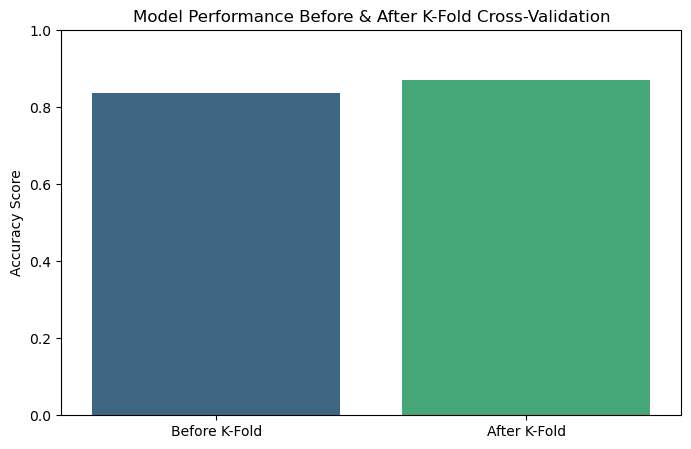

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Load dataset from CSV
restaurants_df = pd.read_csv('Dataset_Updated.csv')

# Data Preparation
restaurants_df['Price Category'] = pd.qcut(restaurants_df['Average Cost for two'], q=4, labels=[1, 2, 3, 4])
X = restaurants_df[['Country Code', 'City', 'Cuisines', 'Average Cost for two']]
X = pd.get_dummies(X, columns=['City', 'Cuisines'], drop_first=True)
y = restaurants_df['Price Category']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train classifier (before cross-validation)
classifier = RandomForestClassifier(n_estimators=100, max_depth=15, min_samples_split=5, min_samples_leaf=2, random_state=42)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

# Model evaluation before cross-validation
pre_cv_accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy before K-Fold:", pre_cv_accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Implementing K-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
kfold_scores = cross_val_score(classifier, X, y, cv=kf, scoring='accuracy')

# Model evaluation after cross-validation
post_cv_accuracy = np.mean(kfold_scores)
print("\nAccuracy after K-Fold:", post_cv_accuracy)

# Comparison Chart
labels = ['Before K-Fold', 'After K-Fold']
accuracies = [pre_cv_accuracy, post_cv_accuracy]

plt.figure(figsize=(8, 5))
sns.barplot(x=labels, y=accuracies, palette='viridis')
plt.ylim(0, 1)
plt.ylabel("Accuracy Score")
plt.title("Model Performance Before & After K-Fold Cross-Validation")
plt.show()



✅ Model saved as 'restaurant_recommendation_model.pkl'

Accuracy before Hyperparameter Tuning: 0.9957378795950985

Accuracy after Hyperparameter Tuning: 0.9126265316995205

Accuracy after Loading the Model: 0.9126265316995205

Classification Report After Loading:
               precision    recall  f1-score   support

           1       0.99      1.00      1.00       508
           2       1.00      0.97      0.98       435
           3       0.76      1.00      0.86       503
           4       1.00      0.66      0.79       431

    accuracy                           0.91      1877
   macro avg       0.94      0.91      0.91      1877
weighted avg       0.93      0.91      0.91      1877



/tmp/ipykernel_13224/279430547.py:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=accuracies, palette='viridis')


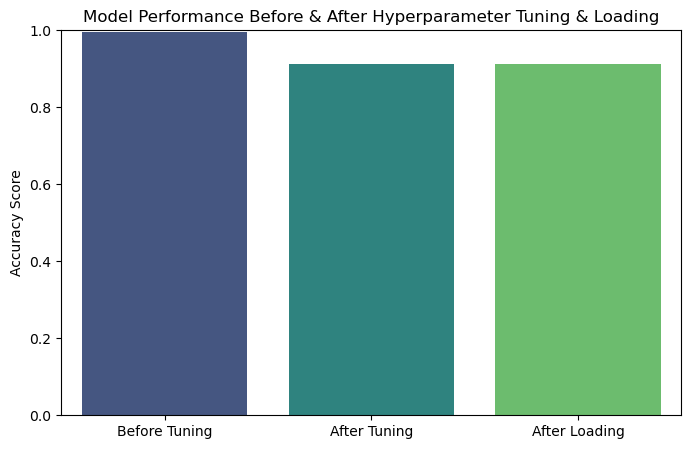

Enter your country:  India
Enter your city:  Gurgaon
Enter preferred cuisines:  
Enter your budget for two (in ₹):  2000



🎯 **Top Recommended Restaurants Near Your Budget:**

🍽 **Manhattan Brewery & Bar Exchange**
📍 **City & Address:** Gurgaon, 1st Floor, Global Foyer Mall, Sector 43, Golf Course Road, Gurgaon
🍜 **Cuisine Type:** Finger Food, American, Continental, North Indian, Italian
💰 **Average Cost for Two:** ₹2000
⭐ **Rating:** 4.6 ⭐ – Excellent
🚀 **Online Delivery Available:** No
🪑 **Table Booking Available:** No
--------------------------------------------------
🍽 **Punjab Grill**
📍 **City & Address:** Gurgaon, 3rd Floor, Ambience Mall, Gurgaon
🍜 **Cuisine Type:** North Indian, Mughlai
💰 **Average Cost for Two:** ₹2000
⭐ **Rating:** 4.3 ⭐ – Very Good
🚀 **Online Delivery Available:** No
🪑 **Table Booking Available:** No
--------------------------------------------------
🍽 **Pirates of Grill**
📍 **City & Address:** Gurgaon, Ground Floor, MGF Mega City Mall, MG Road, Gurgaon
🍜 **Cuisine Type:** North Indian, Continental, Mughlai, Asian
💰 **Average Cost for Two:** ₹2000
⭐ **Rating:** 4.1 ⭐ – Very Goo

/tmp/ipykernel_13224/279430547.py:93: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Budget Difference'] = abs(filtered_df['Average Cost for two'] - budget)


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score

# Load dataset from CSV
restaurants_df = pd.read_csv('Dataset_Updated.csv')

# Data Preparation
restaurants_df['Price Category'] = pd.qcut(restaurants_df['Average Cost for two'], q=4, labels=[1, 2, 3, 4])
X = restaurants_df[['Country Code', 'City', 'Cuisines', 'Average Cost for two']]
X = pd.get_dummies(X, columns=['City', 'Cuisines'], drop_first=True)
y = restaurants_df['Price Category']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model evaluation before hyperparameter tuning
base_classifier = RandomForestClassifier(random_state=42)
base_classifier.fit(X_train, y_train)
base_y_pred = base_classifier.predict(X_test)
base_accuracy = accuracy_score(y_test, base_y_pred)

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_

# Train classifier with best parameters
classifier = RandomForestClassifier(**best_params, random_state=42)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
tuned_accuracy = accuracy_score(y_test, y_pred)

# Save the model as a .pkl file
joblib.dump(classifier, 'restaurant_recommendation_model.pkl')
print("\n✅ Model saved as 'restaurant_recommendation_model.pkl'")

# Load and test the saved model
loaded_model = joblib.load('restaurant_recommendation_model.pkl')
loaded_y_pred = loaded_model.predict(X_test)
loaded_accuracy = accuracy_score(y_test, loaded_y_pred)

print("\nAccuracy before Hyperparameter Tuning:", base_accuracy)
print("\nAccuracy after Hyperparameter Tuning:", tuned_accuracy)
print("\nAccuracy after Loading the Model:", loaded_accuracy)
print("\nClassification Report After Loading:\n", classification_report(y_test, loaded_y_pred))

# Comparison Chart
labels = ['Before Tuning', 'After Tuning', 'After Loading']
accuracies = [base_accuracy, tuned_accuracy, loaded_accuracy]

plt.figure(figsize=(8, 5))
sns.barplot(x=labels, y=accuracies, palette='viridis')
plt.ylim(0, 1)
plt.ylabel("Accuracy Score")
plt.title("Model Performance Before & After Hyperparameter Tuning & Loading")
plt.show()

# ---------------------- Restaurant Recommendation System ----------------------

def recommend_restaurant():
    """
    Interactive restaurant recommendation based on user input.
    """
    country = input("Enter your country: ")
    city = input("Enter your city: ")
    cuisines = input("Enter preferred cuisines: ")
    budget = int(input("Enter your budget for two (in ₹): "))

    # Filter dataset based on user inputs
    filtered_df = restaurants_df[
        (restaurants_df['Country'] == country) &
        (restaurants_df['City'] == city) &
        (restaurants_df['Cuisines'].str.contains(cuisines, case=False, na=False))
    ]

    if filtered_df.empty:
        print("\n⚠️ No matching restaurants found. Try different filters.")
        return None

    # Find the closest restaurants to the given budget
    filtered_df['Budget Difference'] = abs(filtered_df['Average Cost for two'] - budget)
    sorted_df = filtered_df.sort_values(by=['Budget Difference', 'Aggregate rating'], ascending=[True, False])

    # Selecting top 5 recommendations
    recommendations = sorted_df.head(10)

    # Display results without the final table format
    print("\n🎯 **Top Recommended Restaurants Near Your Budget:**\n")
    for index, row in recommendations.iterrows():
        print(f"🍽 **{row['Restaurant Name']}**")
        print(f"📍 **City & Address:** {row['City']}, {row['Address']}")
        print(f"🍜 **Cuisine Type:** {row['Cuisines']}")
        print(f"💰 **Average Cost for Two:** ₹{row['Average Cost for two']}")
        print(f"⭐ **Rating:** {row['Aggregate rating']} ⭐ – {row['Rating text']}")
        print(f"🚀 **Online Delivery Available:** {'Yes' if row['Has Online delivery'] == 1 else 'No'}")
        print(f"🪑 **Table Booking Available:** {'Yes' if row['Has Table booking'] == 1 else 'No'}")
        print("-" * 50)

# Call the function
recommend_restaurant()
